In [1]:
from keras.applications.vgg16 import VGG16, preprocess_input
from keras.preprocessing import image
from keras.layers import Dense, Flatten, Dropout
from keras.models import Sequential
from numpy import load, savez_compressed as savez
from keras.optimizers import Adam
from numpy.random import choice
import os
import matplotlib.pyplot as plt
%matplotlib inline

/Users/sunny/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


Skip loading dataset and forward prop if the features are alreay extracted.

In [2]:
train = load('training_data.npz')
train_dataset = train['arr_0']
train_labels = train['arr_1']
del train

In [3]:
valid = load('validation_data.npz')
valid_dataset = valid['arr_0']
valid_labels = valid['arr_1']
del valid

In [4]:
print(train_dataset.shape)

(9866, 224, 224, 3)


In [5]:
base_model = VGG16(weights = 'imagenet', include_top = False)
print('Model Loaded.')

Model Loaded.


Try to check for saved features. If not found, then forward prop. Otherwise, load.

In [ ]:
print('Extracting features using the model:')
train_features = base_model.predict(train_dataset, verbose=1)
print('Train Features Extracted.')
valid_features = base_model.predict(valid_dataset, verbose=1)
print('Valid Features Extracted.')

In [15]:
features = load('Conv_Features_VGG16.npz')
train_features = features['train']
valid_features = features['valid']

In [12]:
print(train_features.shape)

(9866, 25088)


In [ ]:
train_features = train_features.reshape((9866,-1))
valid_features = valid_features.reshape((3430,-1))
print(train_features.shape)

In [24]:
model = Sequential()
model.add(Dense(512, input_dim=7*7*512, activation='relu', kernel_initializer='random_normal'))
model.add(Dropout(0.5))
model.add(Dense(512, activation='sigmoid', kernel_initializer='random_normal'))
model.add(Dropout(0.5))
model.add(Dense(11, activation='softmax', kernel_initializer='random_normal'))

Check number of epochs. Each epoch runs through the entire dataset.

In [ ]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(train_features, train_labels, batch_size = 128, epochs = 100, verbose=1, 
          \validation_data = (valid_features, valid_labels))

Train on 9866 samples, validate on 3430 samples
Epoch 1/100
9866/9866 [==============================] - 22s 2ms/step - loss: 2.2647 - acc: 0.2362 - val_loss: 1.7108 - val_acc: 0.3895
Epoch 2/100
9866/9866 [==============================] - 20s 2ms/step - loss: 1.8171 - acc: 0.3672 - val_loss: 1.4006 - val_acc: 0.5662
Epoch 3/100
9866/9866 [==============================] - 22s 2ms/step - loss: 1.5132 - acc: 0.4733 - val_loss: 1.1482 - val_acc: 0.6490
Epoch 4/100
9866/9866 [==============================] - 23s 2ms/step - loss: 1.2877 - acc: 0.5650 - val_loss: 0.9532 - val_acc: 0.7093
Epoch 5/100
9866/9866 [==============================] - 28s 3ms/step - loss: 1.1606 - acc: 0.6030 - val_loss: 0.8920 - val_acc: 0.7283
Epoch 6/100
9866/9866 [==============================] - 27s 3ms/step - loss: 1.0339 - acc: 0.6468 - val_loss: 0.7880 - val_acc: 0.7405
Epoch 7/100
9866/9866 [==============================] - 25s 3ms/step - loss: 0.9599 - acc: 0.6726 - val_loss: 0.7715 - val_acc: 0.7411


In [ ]:
savez('Conv_Features_VGG16', train=train_features, valid=valid_features)

In [ ]:
model.save('VGG16_Conv_features_model.h5')

In [2]:
from keras.models import load_model
model = load_model('VGG16_Conv_features_model.h5')

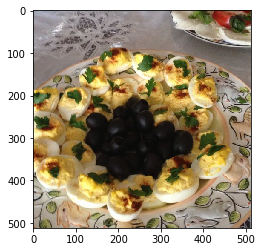

Food Identified: Egg
Calories per 100 grams: 155 calories


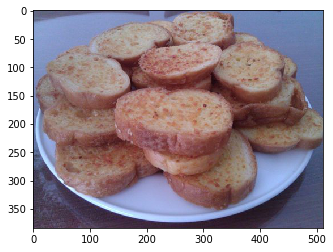

Food Identified: Bread
Calories per 100 grams: 265 calories


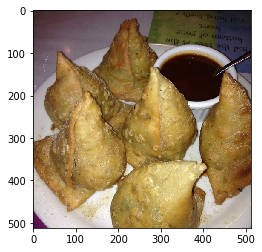

Food Identified: Fried food
Calories per 100 grams: 312 calories


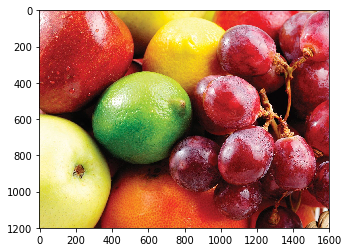

Food Identified: Vegetable/Fruit
Calories per 100 grams: 50-100 calories


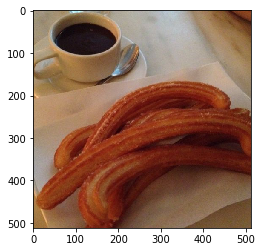

Food Identified: Fried food
Calories per 100 grams: 312 calories


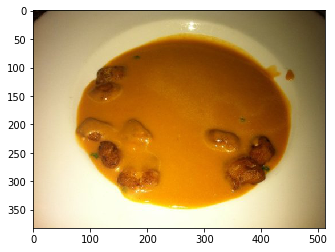

Food Identified: Soup
Calories per 100 grams: 11-100 calories


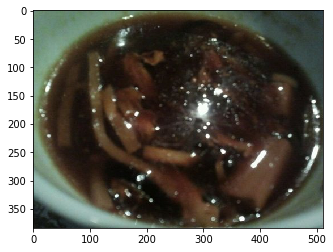

Food Identified: Soup
Calories per 100 grams: 11-100 calories


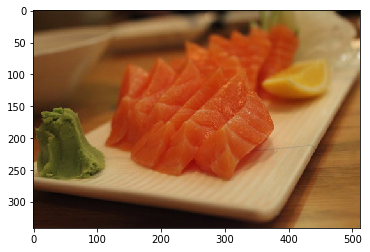

Food Identified: Seafood
Calories per 100 grams: 204 calories


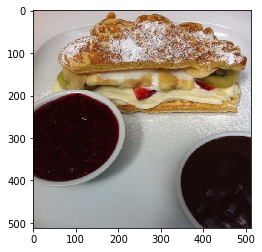

Food Identified: Dessert
Calories per 100 grams: 257-400 calories


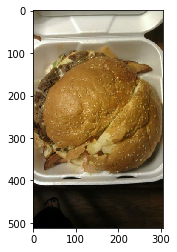

Food Identified: Egg
Calories per 100 grams: 155 calories


In [9]:
path = 'Food-11_images/evaluation'
for img in choice(os.listdir(path), 10):
    a = plt.imread(path+'/'+img)
    plt.figure()
    plt.imshow(a)
    plt.show()
    temp = image.load_img(path+'/'+img, target_size = (224,224,3))
    temp = image.img_to_array(temp)
    temp = preprocess_input(temp)
    temp = temp.reshape((1,224,224,3))
    temp = base_model.predict(temp)
    temp = temp.reshape((1,-1))
    temp = model.predict(temp)
    temp = np.argmax(temp)
    print('Food Identified: '+item_dict[temp])
    print('Calories per 100 grams: '+calorie_dict[temp])
plt.show()